In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import pandas
from scipy.stats import mstats

In [2]:
#*******************************Load data***************************************

data_raw = []
for week in range(1, 5):
    week_data = pd.read_csv('Ljmuin{}.csv'.format(week),usecols=[2]).values
    data_raw.append(week_data)

In [3]:
data = np.concatenate(data_raw)
data= pd.DataFrame(data)

In [4]:
## Cleaning up the data
data.columns=["traffic"]

In [5]:
data.head()

,traffic
0,23779
1,66568
2,12168
3,9563
4,10391


In [6]:
# make dataset numeric
data = data.astype('float32')

# show descriptive stats:
# summarize dataset
print("Shape of the dataset :", data.shape)
print()
print("First rows of the dataset :", data.head())
print()
print("Statistics on the dataset :",data.describe())

Shape of the dataset : (1004298, 1)

First rows of the dataset :    traffic
0  23779.0
1  66568.0
2  12168.0
3   9563.0
4  10391.0

Statistics on the dataset :             traffic
count  1.004298e+06
mean   9.358708e+04
std    7.230369e+05
min    6.840000e+02
25%    1.037200e+04
50%    2.506800e+04
75%    5.872600e+04
max    6.744181e+07


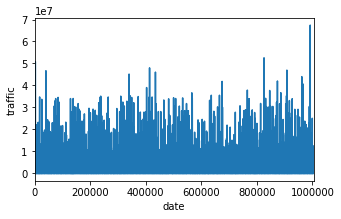

In [7]:
plt.figure(figsize= (5,3))
data['traffic'].plot()
plt.ylabel("traffic")
plt.xlabel("date")
plt.show()

In [8]:
#Check for missing values
print("total number of rows : {0}".format(len(data)))
print("number of rows missing traffic: {0}".format(len(data.loc[data['traffic'] == 0])))
print(data.head())

#Fill missing values
data = data.replace(0, np.nan) # first replace 0 values with nan values, otherwise fill function doesnot work
#daily_data.fillna(method= 'bfill', inplace=True) # fill using backward fill pandas function
data.interpolate(method= 'linear', inplace=True)


#Check how many other missing(zero) values
print("total number of rows : {0}".format(len(data)))
print("number of rows missing traffic: {0}".format(len(data.loc[data['traffic'] == 0])))
print(data.head())

total number of rows : 1004298
number of rows missing traffic: 0
   traffic
0  23779.0
1  66568.0
2  12168.0
3   9563.0
4  10391.0
total number of rows : 1004298
number of rows missing traffic: 0
   traffic
0  23779.0
1  66568.0
2  12168.0
3   9563.0
4  10391.0


# Test for normality

In [9]:
stat, p = stats.normaltest(data.traffic)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=2560211.497, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 1187.691812278465
Skewness of normal distribution: 28.823219299316406


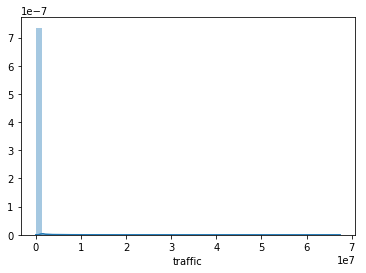

In [10]:

sns.distplot(data.traffic);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.traffic)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.traffic)))

In [11]:
data.shape

(1004298, 1)

# Non parametric test

***Kruskal Wallis test***

In [12]:


print("Kruskal Wallis H-test test:")

H, pval = mstats.kruskalwallis(data)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:
H-statistic: 1004296.9999999997
P-Value: 0.4998123395597606
Accept NULL hypothesis - No significant difference between groups.
